# Cleaning Data

## About the data
In this notebook, we will using daily temperature data from the [National Centers for Environmental Information (NCEI) API](https://www.ncdc.noaa.gov/cdo-web/webservices/v2). We will use the Global Historical Climatology Network - Daily (GHCND) data set; see the documentation [here](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf).

This data was collected for the LaGuardia Airport station in New York City for October 2018. It contains:
- the daily minimum temperature (`TMIN`)
- the daily maximum temperature (`TMAX`)
- the daily average temperature (`TAVG`)

*Note: The NCEI is part of the National Oceanic and Atmospheric Administration (NOAA) and, as you can see from the URL for the API, this resource was created when the NCEI was called the NCDC. Should the URL for this resource change in the future, you can search for the NCEI weather API to find the updated one.*

In addition, we will be using S&P 500 stock market data for the S&P 500 and data for bitcoin for 2017 through 2018. Both were obtained using the [`stock_analysis` package](https://github.com/stefmolin/stock-analysis) we will build in [chapter 7](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_07).

## Setup
We need to import `pandas` and read in our data to get started:

In [69]:
import pandas as pd

df = pd.read_csv("/home/hicham/Python/Introduction to Mashine Learning/Hands-On-Data-Analysis-with-Pandas-master/ch_03/data/nyc_temperatures.csv")
df.head()

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


In [1]:
import os 


#current dir
cwd = os.getcwd()
cwd

'/home/hicham/Python/Introduction to Mashine Learning/Hands-On-Data-Analysis-with-Pandas-master/ch_03'

## Renaming Columns
We start out with the following columns:

In [70]:
df.columns

Index(['attributes', 'datatype', 'date', 'station', 'value'], dtype='object')

We want to rename the `value` column to indicate it contains the temperature in Celsius and the `attributes` column to say `flags` since each value in the comma-delimited string is a different flag about the data collection. For this task, we use the `rename()` method and pass in a dictionary mapping the column names to their new names. We pass `inplace=True` to change our original dataframe instead of getting a new one back:

In [71]:
df.rename(
    columns={
        'value' : 'temp_C',
        'attributes' : 'flags'
    }, inplace=True
)

Those columns have been successfully renamed:

In [72]:
df.columns

Index(['flags', 'datatype', 'date', 'station', 'temp_C'], dtype='object')

We can also perform string operations on the column names with `rename()`:

In [73]:
df.rename(str.upper, axis='columns').columns

Index(['FLAGS', 'DATATYPE', 'DATE', 'STATION', 'TEMP_C'], dtype='object')

## Type Conversion
The `date` column is not currently being stored as a `datetime`:

In [74]:
df.dtypes

flags        object
datatype     object
date         object
station      object
temp_C      float64
dtype: object

Let's perform the conversion with `pd.to_datetime()`:

In [75]:
df.loc[:,'date'] = pd.to_datetime(df.date)
df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
dtype: object

Now we get useful information when we use `describe()` on this column:

In [76]:
df.date.describe()

count                      93
unique                     31
top       2018-10-01 00:00:00
freq                        3
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

We can use `tz_localize()` on a `DatetimeIndex`/`PeriodIndex` to convert to a desired timezone:

In [77]:
pd.date_range(start='2018-10-25', periods=8, freq='D').tz_localize('EST')

DatetimeIndex(['2018-10-25 00:00:00-05:00', '2018-10-26 00:00:00-05:00',
               '2018-10-27 00:00:00-05:00', '2018-10-28 00:00:00-05:00',
               '2018-10-29 00:00:00-05:00', '2018-10-30 00:00:00-05:00',
               '2018-10-31 00:00:00-05:00', '2018-11-01 00:00:00-05:00'],
              dtype='datetime64[ns, EST]', freq=None)

This also works with a `Series`/`DataFrame` with one of the aforementioned as its `Index`. Let's read in the CSV again for this example and set the `date` column to be the index and stored as a datetime:

In [78]:
eastern = pd.read_csv(
"/home/hicham/Python/Introduction to Mashine Learning/Hands-On-Data-Analysis-with-Pandas-master/ch_03/data/nyc_temperatures.csv", 
index_col='date', parse_dates=True).tz_localize('EST')
eastern.head()

,attributes,datatype,station,value
date,,,,
2018-10-01 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 00:00:00-05:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


We can use `tz.convert()` to convert to another timezone from there. If we convert the Eastern datetimes to UTC, they will now be at 5 AM, since `pandas` will use the offsets to convert:

In [79]:
eastern.tz_convert('UTC').head()

,attributes,datatype,station,value
date,,,,
2018-10-01 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,21.2
2018-10-01 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,25.6
2018-10-01 05:00:00+00:00,",,W,2400",TMIN,GHCND:USW00014732,18.3
2018-10-02 05:00:00+00:00,"H,,S,",TAVG,GHCND:USW00014732,22.7
2018-10-02 05:00:00+00:00,",,W,2400",TMAX,GHCND:USW00014732,26.1


We can change the period of the index as well. We could change the period to be monthly to make it easier to aggregate later. (Aggregation will be discussed in [chapter 4](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_04)).

In [80]:
eastern.to_period('M').index

PeriodIndex(['2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-10', '2018-10', '2018-10',
             '2018-10', '2018-10', '2018-10', '2018-

In [81]:
eastern['month']=eastern.to_period('M').index
eastern.head()

,attributes,datatype,station,value,month
date,,,,,
2018-10-01 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,21.2,2018-10
2018-10-01 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,25.6,2018-10
2018-10-01 00:00:00-05:00,",,W,2400",TMIN,GHCND:USW00014732,18.3,2018-10
2018-10-02 00:00:00-05:00,"H,,S,",TAVG,GHCND:USW00014732,22.7,2018-10
2018-10-02 00:00:00-05:00,",,W,2400",TMAX,GHCND:USW00014732,26.1,2018-10


We now get a `PeriodIndex` which we can change back into a `DatetimeIndex` with `pd.to_timestamp()`:

In [82]:
eastern.to_period('M').to_timestamp().index

DatetimeIndex(['2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
               '2018-10-01', '2018-10-01', '2018-10-01', '2018-10-01',
      

We can use the `assign()` method for working with multiple columns at once (or creating new ones). Since our `date` column has already been converted, we need to read in the data again:

In [83]:
df = pd.read_csv("/home/hicham/Python/Introduction to Mashine Learning/Hands-On-Data-Analysis-with-Pandas-master/ch_03/data/nyc_temperatures.csv").rename(
    columns={
        'value' : 'temp_C',
        'attributes' : 'flags'
    }
)

new_df = df.assign(
    date=pd.to_datetime(df.date),
    temp_F=(df.temp_C * 9/5) + 32
)
new_df.dtypes

flags               object
datatype            object
date        datetime64[ns]
station             object
temp_C             float64
temp_F             float64
dtype: object

In [84]:
df.head()

,flags,datatype,date,station,temp_C
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


In [85]:
new_df.head()

,flags,datatype,date,station,temp_C,temp_F
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,70.16
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,78.08
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,64.94
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,72.86
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,78.98


The `date` column now has datetimes and the `temp_F` column was added:

In [86]:
new_df.head()

,flags,datatype,date,station,temp_C,temp_F
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,70.16
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,78.08
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,64.94
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,72.86
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,78.98


We can also use `astype()` to perform conversions. Let's create columns of the integer portion of the temperatures in Celsius and Fahrenheit:

In [87]:
df = df.assign(
    date=pd.to_datetime(df.date),
    temp_C_whole=df.temp_C.astype('int'),
    temp_F=(df.temp_C * 9/5) + 32,
    temp_F_whole=lambda x: x.temp_F.astype('int')
)

df.head()

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,64.94,64
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78


Creating categories:

In [88]:
df_with_categories = df.assign(
    station=df.station.astype('category'),
    datatype=df.datatype.astype('category')
)
df_with_categories.dtypes

flags                   object
datatype              category
date            datetime64[ns]
station               category
temp_C                 float64
temp_C_whole             int64
temp_F                 float64
temp_F_whole             int64
dtype: object

In [89]:
df_with_categories.head()

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,64.94,64
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78


Our categories have no order, but this is something `pandas` supports:

In [90]:
pd.Categorical(
    ['med', 'med', 'low', 'high'], 
    categories=['low', 'med', 'high'],
    ordered=True
)

['med', 'med', 'low', 'high']
Categories (3, object): ['low' < 'med' < 'high']

## Reordering, reindexing, and sorting
Say we want to find the hottest days in the temperature data; we can sort our values by the `temp_C` column with the largest on top to find this: 

In [91]:
df.sort_values(by='temp_C', ascending=False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


In [92]:
df.sort_values(by=['temp_C', 'date'], ascending=False).head(10)

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
25,",,W,2400",TMAX,2018-10-09,GHCND:USW00014732,25.6,25,78.08,78
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,78.08,78
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,77.00,77
27,"H,,S,",TAVG,2018-10-10,GHCND:USW00014732,23.8,23,74.84,74
30,"H,,S,",TAVG,2018-10-11,GHCND:USW00014732,23.4,23,74.12,74


When just looking for the n-largest values, rather than wanting to sort all the data, we can use `nlargest()`:

In [93]:
df.nlargest(n=5, columns='temp_C')

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
19,",,W,2400",TMAX,2018-10-07,GHCND:USW00014732,27.8,27,82.04,82
28,",,W,2400",TMAX,2018-10-10,GHCND:USW00014732,27.8,27,82.04,82
31,",,W,2400",TMAX,2018-10-11,GHCND:USW00014732,26.7,26,80.06,80
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,78.98,78
10,",,W,2400",TMAX,2018-10-04,GHCND:USW00014732,26.1,26,78.98,78


We use `nsmallest()` for the n-smallest values. Note that these can also take a list of columns; however, it won't work with the `date` column.

In [94]:
df.nsmallest(n=5, columns=['temp_C', 'date'])

,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
65,",,W,2400",TMIN,2018-10-22,GHCND:USW00014732,5.6,5,42.08,42
77,",,W,2400",TMIN,2018-10-26,GHCND:USW00014732,5.6,5,42.08,42
62,",,W,2400",TMIN,2018-10-21,GHCND:USW00014732,6.1,6,42.98,42
74,",,W,2400",TMIN,2018-10-25,GHCND:USW00014732,6.1,6,42.98,42
53,",,W,2400",TMIN,2018-10-18,GHCND:USW00014732,6.7,6,44.06,44


The `sample()` method will give us rows (or columns with `axis=1`) at random. We can provide the `random_state` to make this reproducible. The index after we do this is jumbled:

In [95]:
df.sample(5, random_state=0).index

Int64Index([2, 30, 55, 16, 13], dtype='int64')

We can use `sort_index()` to order it again:

In [96]:
df.sample(5, random_state=0).sort_index().index

Int64Index([2, 13, 16, 30, 55], dtype='int64')

The `sort_index()` method can also sort columns alphabetically:

In [97]:
df.sort_index(axis=1).head()

,datatype,date,flags,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,TAVG,2018-10-01,"H,,S,",GHCND:USW00014732,21.2,21,70.16,70
1,TMAX,2018-10-01,",,W,2400",GHCND:USW00014732,25.6,25,78.08,78
2,TMIN,2018-10-01,",,W,2400",GHCND:USW00014732,18.3,18,64.94,64
3,TAVG,2018-10-02,"H,,S,",GHCND:USW00014732,22.7,22,72.86,72
4,TMAX,2018-10-02,",,W,2400",GHCND:USW00014732,26.1,26,78.98,78


This can make selection with `loc` easier for many columns:

In [98]:
df.sort_index(axis=1).head().loc[:,'temp_C':'temp_F_whole']

,temp_C,temp_C_whole,temp_F,temp_F_whole
0,21.2,21,70.16,70
1,25.6,25,78.08,78
2,18.3,18,64.94,64
3,22.7,22,72.86,72
4,26.1,26,78.98,78


We must sort the index to compare two dataframes. If the index is different, but the data is the same, they will be marked not-equal:

In [99]:
df.equals(df.sort_values(by='temp_C'))

False

Sorting the index solves this issue:

In [100]:
df.equals(df.sort_values(by='temp_C').sort_index())

True

We can also use `reset_index()` to get a fresh index and move our current index into a column for safe keeping. This is especially useful if we had data, such as the date, in the index that we don't want to lose:

In [101]:
df[df.datatype == 'TAVG'].head().reset_index()

,index,flags,datatype,date,station,temp_C,temp_C_whole,temp_F,temp_F_whole
0,0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,70.16,70
1,3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,72.86,72
2,6,"H,,S,",TAVG,2018-10-03,GHCND:USW00014732,21.8,21,71.24,71
3,9,"H,,S,",TAVG,2018-10-04,GHCND:USW00014732,21.3,21,70.34,70
4,12,"H,,S,",TAVG,2018-10-05,GHCND:USW00014732,20.3,20,68.54,68


Let's set the `date` column as our index:

In [102]:
df.set_index('date', inplace=True)
df.head()

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-01,"H,,S,",TAVG,GHCND:USW00014732,21.2,21,70.16,70
2018-10-01,",,W,2400",TMAX,GHCND:USW00014732,25.6,25,78.08,78
2018-10-01,",,W,2400",TMIN,GHCND:USW00014732,18.3,18,64.94,64
2018-10-02,"H,,S,",TAVG,GHCND:USW00014732,22.7,22,72.86,72
2018-10-02,",,W,2400",TMAX,GHCND:USW00014732,26.1,26,78.98,78


Now that we have a `DatetimeIndex`, we can do datetime slicing. As long as we provide a date format that pandas understands, we can grab the data. To select all of 2018, we simply use `df['2018']`, for the third quarter of 2018 we can use `['2018-Q3']`, grabbing October is as simple as using `df['2018-10']`; these can also be combined to build ranges. Let's grab October 11, 2018 through October 12, 2018 (inclusive of both endpoints):

In [103]:
df['2018-10-11':'2018-10-12']

,flags,datatype,station,temp_C,temp_C_whole,temp_F,temp_F_whole
date,,,,,,,
2018-10-11,"H,,S,",TAVG,GHCND:USW00014732,23.4,23,74.12,74
2018-10-11,",,W,2400",TMAX,GHCND:USW00014732,26.7,26,80.06,80
2018-10-11,",,W,2400",TMIN,GHCND:USW00014732,21.7,21,71.06,71
2018-10-12,"H,,S,",TAVG,GHCND:USW00014732,18.3,18,64.94,64
2018-10-12,",,W,2400",TMAX,GHCND:USW00014732,22.2,22,71.96,71
2018-10-12,",,W,2400",TMIN,GHCND:USW00014732,12.2,12,53.96,53


Reindexing allows us to conform our axis to contain a given set of labels. Let's turn to the S&P 500 stock data in the `data/sp500.csv` file to see an example of this. Notice we only have data for trading days (weekdays, excluding holidays):

In [104]:
sp = pd.read_csv(
    'data/sp500.csv', index_col='date', parse_dates=True
).drop(columns=['adj_close'])

sp.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3770530000,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3764890000,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3761820000,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3339890000,Friday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3217610000,Monday
2017-01-10,2279.270020,2265.270020,2269.719971,2268.899902,3638790000,Tuesday
2017-01-11,2275.320068,2260.830078,2268.600098,2275.320068,3620410000,Wednesday
2017-01-12,2271.780029,2254.250000,2271.139893,2270.439941,3462130000,Thursday
2017-01-13,2278.679932,2271.510010,2272.739990,2274.639893,3081270000,Friday


If we want to look at the value of a portfolio (group of assets) that trade on different days, we need to handle the mismatch in the index. Bitcoin, for example, trades daily. If we sum up all the data we have for each day (aggregations will be covered in [chapter 4](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_04), so don't fixate on this part), we get the following:

In [105]:
bitcoin = pd.read_csv(
    'data/bitcoin.csv', index_col='date', parse_dates=True
).drop(columns=['market_cap'])

# every day's closing price = S&P 500 close + Bitcoin close (same for other metrics)
portfolio = pd.concat(
    [sp, bitcoin], sort=False
).groupby(pd.Grouper(freq='D')).sum()

portfolio.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,1003.080000,958.700000,963.660000,998.330000,147775008,Sunday
2017-01-02,1031.390000,996.700000,998.620000,1021.750000,222184992,Monday
2017-01-03,3307.959883,3266.729883,3273.170068,3301.670078,3955698000,Tuesday
2017-01-04,3432.240068,3306.000098,3306.000098,3425.480000,4109835984,Wednesday
2017-01-05,3462.600000,3170.869951,3424.909932,3282.380000,4272019008,Thursday
2017-01-06,3328.910098,3148.000059,3285.379893,3179.179980,3691766000,Friday
2017-01-07,908.590000,823.560000,903.490000,908.590000,279550016,Saturday
2017-01-08,942.720000,887.250000,908.170000,911.200000,158715008,Sunday
2017-01-09,3189.179990,3148.709902,3186.830088,3171.729902,3359486992,Monday


It may not be immediately obvious what is wrong with the previous data, but with a visualization we can easily see the cyclical pattern of drops on the days the stock market is closed. (Don't worry about the plotting code too much, we will cover it in depth in chapters [5](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_05) and [6](https://github.com/stefmolin/Hands-On-Data-Analysis-with-Pandas/tree/master/ch_06)).

We will need to import `matplotlib` now:

In [106]:
import matplotlib.pyplot as plt # we use this module for plotting

Now we can see why we need to reindex:

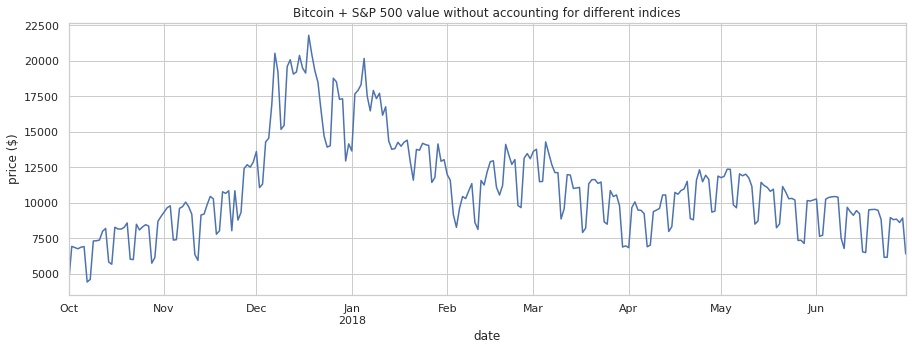

In [107]:
portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', figsize=(15, 5), legend=False,
    title='Bitcoin + S&P 500 value without accounting for different indices'
) # plot the closing price from Q4 2017 through Q2 2018
plt.ylabel('price ($)') # label the y-axis
plt.show() # show the plot

We need to align the index of the S&P 500 to match bitcoin in order to fix this. We will use the `reindex()` method, but by default we get `NaN` for the values that we don't have data for:

In [108]:
sp.reindex(bitcoin.index).head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,NaN,NaN,NaN,NaN,NaN,Saturday
2017-01-08,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


So now we have rows for every day of the year, but all the weekends and holidays have `NaN` values. To address this, we can specify how to handle missing values with the `method` argument. In this case, we want to forward fill, which will put the weekend and holiday values as the value they had for the Friday (or end of trading week) before:

In [109]:
sp.reindex(
    bitcoin.index, method='ffill'
).head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,NaN,Sunday
2017-01-02,NaN,NaN,NaN,NaN,NaN,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Saturday
2017-01-08,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


This isn't perfect though. We probably want 0 for the volume traded and to put the closing price for the open, high, low, and close on the days the market is closed:

In [110]:
import numpy as np

sp_reindexed = sp.reindex(
    bitcoin.index
).assign(
    volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
    close=lambda x: x.close.fillna(method='ffill'), # carry this forward
    # take the closing price if these aren't available
    open=lambda x: np.where(x.open.isnull(), x.close, x.open),
    high=lambda x: np.where(x.high.isnull(), x.close, x.high),
    low=lambda x: np.where(x.low.isnull(), x.close, x.low)
)
sp_reindexed.head(10).assign(
    day_of_week=lambda x: x.index.day_name()
)

,high,low,open,close,volume,day_of_week
date,,,,,,
2017-01-01,NaN,NaN,NaN,NaN,0.000000e+00,Sunday
2017-01-02,NaN,NaN,NaN,NaN,0.000000e+00,Monday
2017-01-03,2263.879883,2245.129883,2251.570068,2257.830078,3.770530e+09,Tuesday
2017-01-04,2272.820068,2261.600098,2261.600098,2270.750000,3.764890e+09,Wednesday
2017-01-05,2271.500000,2260.449951,2268.179932,2269.000000,3.761820e+09,Thursday
2017-01-06,2282.100098,2264.060059,2271.139893,2276.979980,3.339890e+09,Friday
2017-01-07,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Saturday
2017-01-08,2276.979980,2276.979980,2276.979980,2276.979980,0.000000e+00,Sunday
2017-01-09,2275.489990,2268.899902,2273.590088,2268.899902,3.217610e+09,Monday


If we create visualization comparing the reindexed data to the first attempt, we see how reindexing helped maintain the asset value when the market was closed:

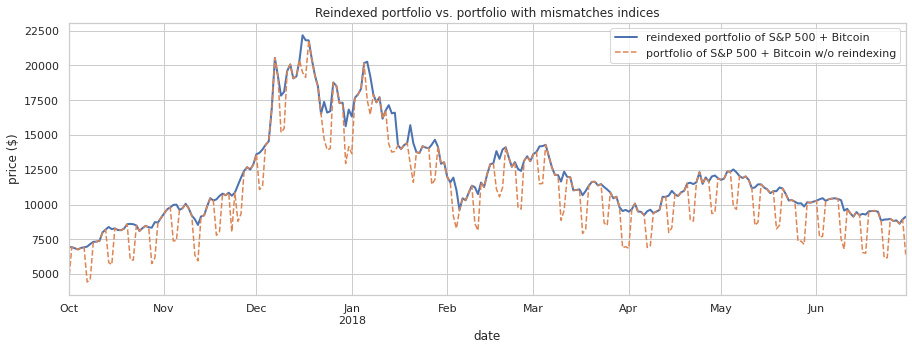

In [111]:
# every day's closing price = S&P 500 close adjusted for market closure + Bitcoin close (same for other metrics)
fixed_portfolio = pd.concat([sp_reindexed, bitcoin], sort=False).groupby(pd.Grouper(freq='D')).sum()

ax = fixed_portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', label='reindexed portfolio of S&P 500 + Bitcoin', figsize=(15, 5), linewidth=2, 
    title='Reindexed portfolio vs. portfolio with mismatches indices'
) # plot the reindexed portfolio's closing price from Q4 2017 through Q2 2018

portfolio['2017-Q4':'2018-Q2'].plot(
    y='close', ax=ax, linestyle='--', label='portfolio of S&P 500 + Bitcoin w/o reindexing'
).set_ylabel('price ($)') # add line for original portfolio for comparison and label y-axis

plt.show() # show the plot

In [112]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from mpl_toolkits.mplot3d import Axes3D

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time
import seaborn as sns
sns.set(style="whitegrid")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.covariance import EllipticEnvelope

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

In [113]:


X_train = np.expand_dims(bitcoin[:600], axis=1)
X_test = np.expand_dims(bitcoin[600:], axis=1)

print(bitcoin.shape)
print(X_train.shape)

(730, 5)
(600, 1, 5)


In [114]:
bitcoin.head()

,open,high,low,close,volume
date,,,,,
2017-01-01,963.66,1003.08,958.70,998.33,147775008
2017-01-02,998.62,1031.39,996.70,1021.75,222184992
2017-01-03,1021.60,1044.08,1021.60,1043.84,185168000
2017-01-04,1044.40,1159.42,1044.40,1154.73,344945984
2017-01-05,1156.73,1191.10,910.42,1013.38,510199008


In [115]:
X = bitcoin[['volume']]
X.shape

(730, 1)

Text(0, 0.5, 'volum')

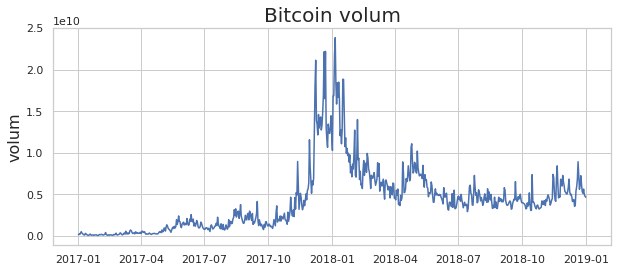

In [116]:

plt.figure(figsize=(10,4))
plt.plot(X)
plt.title('Bitcoin volum', fontsize=20)
plt.ylabel('volum', fontsize=16)


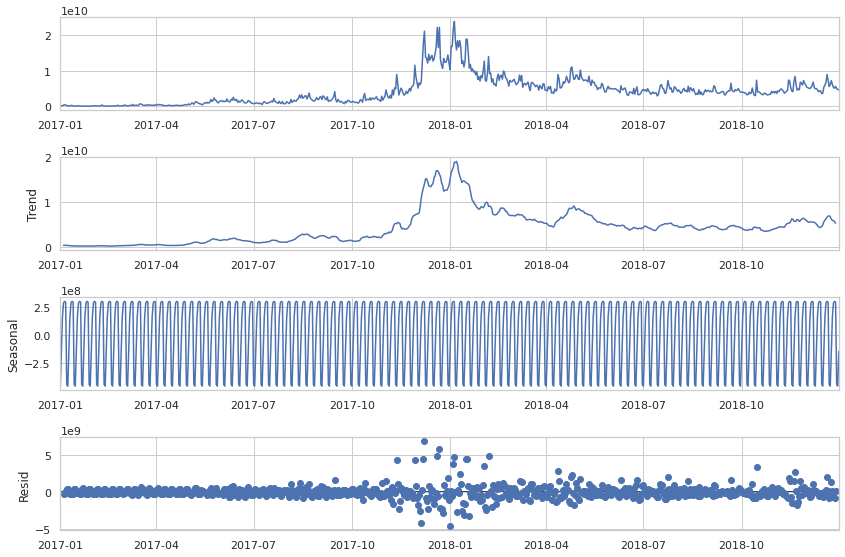

In [117]:
plt.rc('figure',figsize=(12,8))
plt.rc('font',size=15)
result = seasonal_decompose(X,model='additive')
fig = result.plot()

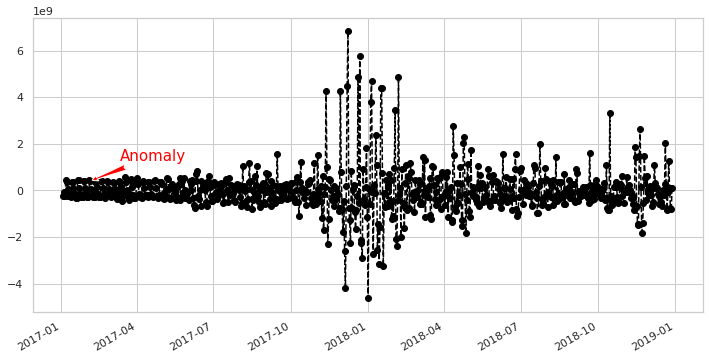

In [118]:

plt.rc('figure',figsize=(12,6))
plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values
ax.plot_date(x, y, color='black',linestyle='--')

ax.annotate('Anomaly', (mdates.date2num(x[35]), y[35]), xytext=(30, 20), 
           textcoords='offset points', color='red',arrowprops=dict(facecolor='red',arrowstyle='fancy'))

fig.autofmt_xdate()
plt.show()

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [120]:
outliers_fraction = float(.01)

scaler = StandardScaler()
np_scaled = scaler.fit_transform(X.values.reshape(-1, 1))
data = pd.DataFrame(np_scaled)

In [121]:
# train isolation forest
model =  IsolationForest(contamination=outliers_fraction)
model.fit(data) 

IsolationForest(contamination=0.01)

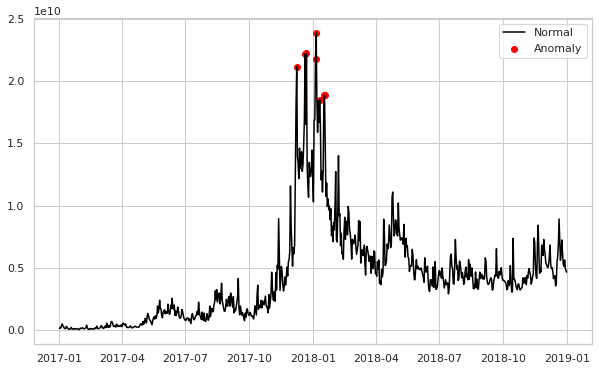

In [122]:
X['anomaly'] = model.predict(data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = X.loc[X['anomaly'] == -1, ['volume']] #anomaly

ax.plot(X.index, X['volume'], color='black', label = 'Normal')
ax.scatter(a.index,a['volume'], color='red', label = 'Anomaly')
plt.legend()
plt.show();

In [123]:
X['anomaly'].value_counts()

 1    722
-1      8
Name: anomaly, dtype: int64

In [124]:
X_whitout_outlier = X[X["anomaly"]==1]
X_whitout_outlier.shape

(722, 2)